In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

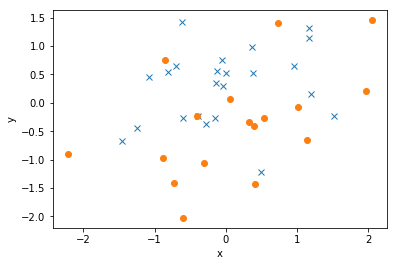

In [5]:
# prepare dataset
np.random.seed(777)
n = 40
omega = np.random.randn()
noise = np.random.randn(n)
lam = 0.01
x = np.random.randn(n, 2)
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0, x[:,0]), np.extract(y>0, x[:,1]), 'x')
plt.plot(np.extract(y<0, x[:,0]), np.extract(y<0, x[:,1]), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# loss example
k = 3
w1hat = np.arange(-k, k, 0.01)
lss = np.zeros(w1hat.shap)
loglss = np.zeros(w1hat.shape)
lslss = np.zeros

Text(0, 0.5, 'loss')

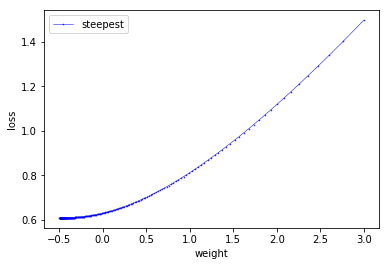

In [13]:
# gradient descent
num_iter = 300
ww = 3
alpha_base = 1
ll_history = []
ww_history = []
lip = 0.25 * max(x[:,0]**2);

for t in range(1, num_iter+1):
    posterior = 1 / (1 + np.exp(-y*(ww*x[:,0] + x[:,1])));
    direction = 1 / n * np.sum((1 - posterior) * y * x[:,0]) + 2 * lam * ww
    ll = 1/n * np.sum(np.log(1 + np.exp(-y * (ww * x[:,0] + x[:,1])))) + lam * (ww**2 + 1)
    ww_history.append(ww);
    ll_history.append(ll);
    ww = ww + alpha_base * 1.0 / np.sqrt(t) / lip * direction;
    
plt.plot(ww_history, ll_history, 'bo-', linewidth = 0.5, markersize = 0.5, label = 'steepest')
plt.legend()
plt.xlabel('weight')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

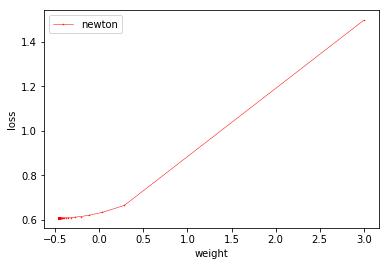

In [14]:
# newton
ll_n_history = np.zeros(num_iter)
ww_n_history = np.zeros(num_iter)
ww = 3

for t in range(num_iter):
    posterior = 1 / (1 + np.exp(-y * (ww * x[:, 0] + x[:,1])))
    
    grad = 1/n * np.sum((1 - posterior) * (-y) * x[:,0]) + 2 * lam * ww
    hess = 1/n * np.sum(posterior * (1 - posterior) * x[:,0]**2) + 2*lam
    ll = 1/n * np.sum(np.log(1.0 + np.exp(-y * (ww*x[:,0] + x[:,1])))) + lam * (ww**2 + 1)
    ww_n_history[t] = ww
    ll_n_history[t] = ll
    ww = ww - grad/hess * 1.0 / np.sqrt(t+10)
    
plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('weight')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

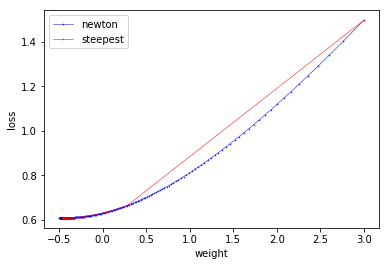

In [15]:
# compare
plt.plot(ww_history, ll_history, 'bo-', linewidth=0.5, markersize=0.5, label='newton')
plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('weight')
plt.ylabel('loss')

In [ ]:
# diff
show_iter = 50
plt.plot(np.abs(ww_history[:show_iter]))